# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'd:\\vscode-projects\\car-price-analysis-hackathon-team4\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'd:\\vscode-projects\\car-price-analysis-hackathon-team4'

# Loading the dataset and initial checks

Section 1 content

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the dataset:
Use pandas to read the raw car data CSV file into a DataFrame.
Check the shape:
Display the number of rows and columns in the loaded DataFrame to understand the dataset size.

In [5]:
df = pd.read_csv('Data/raw/cars.csv')
df.shape

(205, 26)

View DataFrame Information:
Display a concise summary of the DataFrame, including column names, data types, and non-null counts. This helps to quickly assess the structure and completeness of the dataset.

In [6]:
df.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

Preview the Data:
Display the first few rows of the DataFrame to get an initial look at the dataset and verify that it loaded correctly.

In [7]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Summary Statistics:
Generate descriptive statistics for the numerical columns in the DataFrame, such as mean, standard deviation, min, max, and quartiles. This provides a quick overview of the data distribution and helps identify potential outliers or anomalies.

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


List DataFrame Columns:
Display all column names in the DataFrame to review the available features and ensure the expected structure.

In [9]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

---

# Cleaning

Check for Duplicate Rows:
Count the number of duplicate rows in the DataFrame to identify potential data quality issues and ensure the uniqueness of records.

In [10]:
df.duplicated().sum()

0

List DataFrame Columns:
Display all column names in the DataFrame to review the available features and ensure the expected structure.

In [11]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Extract Brand and Model Information:
Split the CarName column into separate brand and model columns for more granular analysis.
Remove the original CarName column to avoid redundancy, and preview the updated DataFrame to verify the changes.

In [12]:
# Extract brand and model from CarName column
df[['brand', 'model']] = df['CarName'].str.split(' ', n=1, expand=True)
# drop CarName column
df = df.drop('CarName', axis=1)
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,model
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


Reorder Columns for Clarity:
Move the brand and model columns to immediately follow car_ID in the DataFrame.
This improves readability and makes it easier to analyze car attributes together.
Preview the updated DataFrame to confirm the new column order.

In [13]:
# Reorder columns to place 'brand' and 'model' right after 'car_ID'
cols = list(df.columns)
car_id_index = cols.index('car_ID')

# Remove brand and model from their current positions
cols.remove('brand')
cols.remove('model')

# Insert brand and model right after car_ID
cols[car_id_index+1:car_id_index+1] = ['brand', 'model']
df = df[cols]
df.head()

,car_ID,brand,model,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero,giulia,3,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero,stelvio,3,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero,Quadrifoglio,1,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi,100 ls,2,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi,100ls,2,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Standardize Brand Names:
Replace typos and inconsistencies in the brand column to ensure all car brands are labeled consistently for analysis and visualization.
Display the unique brand names after correction to verify the changes.

In [14]:
# Standardize brand names to correct typos and inconsistencies
# This ensures all brands are consistently labeled for analysis and visualization
brand_corrections = {
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'alfa-romero': 'alfa-romeo'
}
df['brand'] = df['brand'].replace(brand_corrections)
df['brand'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Check for Missing Values:
Count the number of missing (null) values in each column to identify incomplete data and guide further cleaning steps.

In [15]:
df.isnull().sum() # Check for missing values

car_ID              0
brand               0
model               2
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Handle Missing Model Names:
Fill any missing values in the model column with 'unknown' to maintain data integrity.
Recheck for missing values in all columns to confirm that the issue has been addressed.

In [16]:
df['model'] = df['model'].fillna('null') # Fill missing model names with 'null'
df.isnull().sum()

car_ID              0
brand               0
model               0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Check Data Types:
Display the data type of each column in the DataFrame to ensure correct formats for analysis and identify any columns that may need conversion.

In [17]:
df.dtypes

car_ID                int64
brand                object
model                object
symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Explore Unique Values in Each Column:
Print the unique values for every column in the DataFrame to understand the range and categories of data present, and to identify potential issues or patterns for further analysis.

In [18]:
# Display unique values for every column
for col in df.columns:
    print(f'Unique values in {col}:')
    print(df[col].unique())
    print('-'*40)

Unique values in car_ID:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
----------------------------------------
Unique values in brand:
['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maz

# Transforming

Convert Textual Numbers to Integers:
Map the text values in the doornumber and cylindernumber columns to their corresponding integer values.
This conversion makes the data more suitable for mathematical operations, comparisons, and visualizations.
Preview the updated columns to verify the changes.

In [19]:
# Convert 'doornumber' and 'cylindernumber' from text to integers
# By mapping these words to their corresponding integer values, the data is more suitable for mathematical operations, comparisons, and visualizations.

number_map = {'two': 2, 'four': 4, 'three': 3, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
df['doornumber'] = df['doornumber'].map(number_map)
df['cylindernumber'] = df['cylindernumber'].map(number_map)

df[['doornumber', 'cylindernumber']].head()

,doornumber,cylindernumber
0,2,4
1,2,4
2,2,6
3,4,4
4,4,5


Convert Price Values to Integers:
Round the values in the price column and convert them to integers to ensure consistency and facilitate numerical analysis.

In [20]:
# Convert all price values to integers
df['price'] = df['price'].round().astype(int)

Convert Engine Size to Liters:

Transform the enginesize column from cubic inches to liters by dividing each value by 60. Then, round the results to two decimal places for consistency and readability. This ensures all engine size values are in a standard metric unit suitable for analysis.

In [21]:
df['enginesize'] = df['enginesize']/60 # Convert enginesize from cubic inches to liters
df['enginesize'] = df['enginesize'].round(2).astype(float)
df.head()

,car_ID,brand,model,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romeo,giulia,3,gas,std,2,convertible,rwd,front,...,2.17,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,2,alfa-romeo,stelvio,3,gas,std,2,convertible,rwd,front,...,2.17,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,3,alfa-romeo,Quadrifoglio,1,gas,std,2,hatchback,rwd,front,...,2.53,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,4,audi,100 ls,2,gas,std,4,sedan,fwd,front,...,1.82,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,5,audi,100ls,2,gas,std,4,sedan,4wd,front,...,2.27,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Create Outlier Summary Table:

Generate a summary table that lists, for each numeric feature, the indices and values of detected outliers. This helps to quickly identify which rows (cars) have unusually high or low values for specific features, supporting further investigation or data cleaning. The table provides a clear overview of outlier distribution across the dataset.



In [22]:
# Calculate outlier flags using Z-score for each numeric column
from scipy.stats import zscore

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = df[numeric_cols].apply(zscore)
outlier_flags = (abs(z_scores) > 3)

# Create a table showing outliers for every column
outlier_table = []
for col in outlier_flags.columns:
    outlier_indices = df.index[outlier_flags[col]].tolist()
    outlier_values = df.loc[outlier_flags[col], col].tolist()
    outlier_table.append({
        'Feature': col,
        'Outlier_Indices': outlier_indices,
        'Outlier_Values': outlier_values
    })

outlier_table_df = pd.DataFrame(outlier_table)
outlier_table_df

,Feature,Outlier_Indices,Outlier_Values
0,car_ID,[],[]
1,symboling,[],[]
2,doornumber,[],[]
3,wheelbase,[73],[120.9]
4,carlength,[],[]
5,carwidth,[],[]
6,carheight,[],[]
7,curbweight,[],[]
8,cylindernumber,"[49, 71, 72, 73, 74, 129]","[12, 8, 8, 8, 8, 8]"
9,enginesize,"[47, 48, 49, 73, 74]","[4.3, 4.3, 5.43, 5.13, 5.07]"


Visualize Outliers with Box Plots:

Display box plots for the cylindernumber and enginesize features to identify the distribution and spot potential outliers. Box plots provide a clear summary of the data’s spread, median, and extreme values for each feature. 

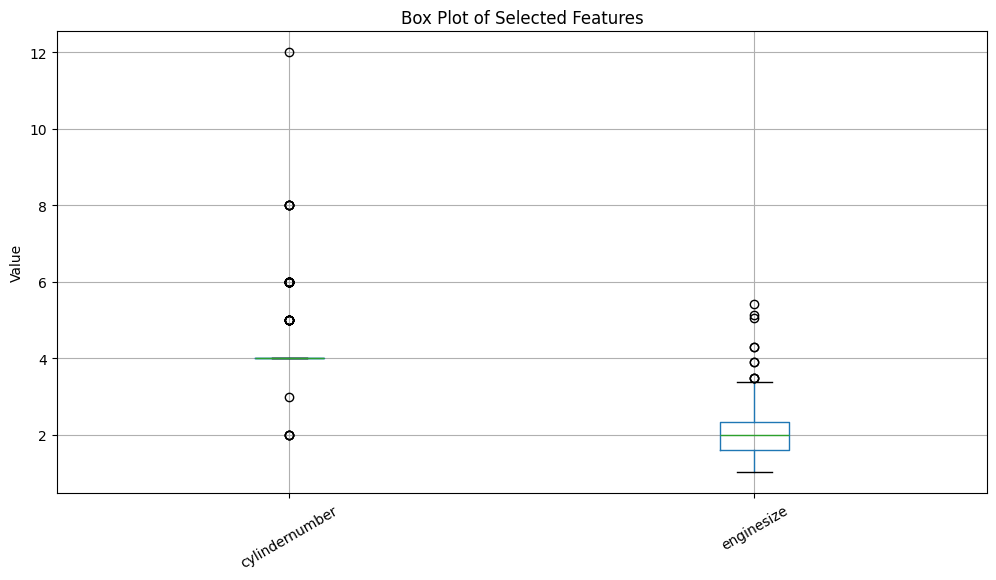

In [23]:
features = ['cylindernumber', 'enginesize']
plt.figure(figsize=(12, 6))
df[features].boxplot()
plt.title('Box Plot of Selected Features')
plt.ylabel('Value')
plt.xticks(rotation=30)
plt.show()

Conclusion: Outliers in the dataset are not random; they cluster in certain features (wheelbase, engine size, cylinder number, price). This is expected in car data, as rare or luxury cars often have extreme values in multiple attributes. They are considered as valid, so they will not be removed.

# New features

Power-to-weight ratio - provides a more accurate measure of a car's real-world performance than horsepower alone. By dividing horsepower by curb weight, you account for both engine power and vehicle mass. This ratio helps compare cars of different sizes and weights, showing which vehicles are likely to accelerate faster and feel more responsive. It is a key feature for performance analysis

In [24]:
df['power_to_weight'] = df['horsepower'] / df['curbweight'] # Create power-to-weight ratio feature


Car volume calculation - provides an estimate of the vehicle's overall physical size. This feature helps comparing cars in terms of interior space, comfort, and cargo capacity. It is useful for understanding how spacious or practical a car is, which can be important for buyers interested in family cars, SUVs, or vehicles with more storage. Including car volume allows for a more comprehensive analysis beyond just performance metrics.

In [25]:
df['car_volume'] = df['carlength'] * df['carwidth'] * df['carheight'] # Create car volume feature

---

Mpg ratio - helps comparing a car’s fuel efficiency in city versus highway driving conditions. By dividing city mpg by highway mpg, we can identify vehicles that perform similarly or differently across these environments. A ratio close to 1 means the car is efficient in both settings, while a lower ratio may indicate much better highway efficiency. This feature is useful for understanding real-world fuel consumption patterns and for recommending cars based on typical driving habits.

In [26]:
df['mpg_ratio'] = df['citympg'] / df['highwaympg'] # Create mpg ratio feature

Luxury car flag - helps us identify which cars in your dataset are considered luxury based on their price. By setting a threshold at the 75th percentile, we classify the top 25% most expensive cars as luxury. This feature is useful for segmenting the market, analyzing trends, and comparing characteristics between luxury and non-luxury vehicles. It supports targeted analysis and can be valuable for marketing, pricing strategies, or customer recommendations.

In [27]:
luxury_threshold = df['price'].quantile(0.75) # Determine 75th percentile price threshold
df['is_luxury'] = (df['price'] > luxury_threshold).astype(int) # Flag cars above threshold as luxury (1) or not (0)

# Standardisation
Ensure that categorical and textual data are consistent, readable, and grouped logically. By replacing codes, fixing typos, and merging similar values, we make the dataset easier to analyze, visualize, and model. Standardization prevents errors, improves data quality, and enables reliable comparisons across features.

In [28]:
print(df['enginetype'].unique()) # Display unique engine types to identify categories for one-hot encoding

['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


Standardize and relabel engine type values to group similar categories and replace technical codes with descriptive labels, making the data more consistent and easier to interpret for analysis.

In [29]:
print('Raw enginetype value counts:')
print(df['enginetype'].value_counts())
mapping = {
    "ohcv": "ohc",
    "ohcf": "ohc",
    "dohcv": "dohc",
    "l": "inline"
}
df["enginetype"] = df["enginetype"].replace(mapping)

# Make values readable
label_map = {
    "dohc": "DOHC (Double Overhead Camshaft)",
    "ohc": "OHC (Overhead Camshaft)",
    "inline": "Inline Engine",
    "rotor": "Rotary Engine"
}
df["enginetype"] = df["enginetype"].map(label_map)

# Display unique values after relabeling
print('Unique enginetype values after relabeling:')
print(df['enginetype'].unique())

Raw enginetype value counts:
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64
Unique enginetype values after relabeling:
['DOHC (Double Overhead Camshaft)' 'OHC (Overhead Camshaft)'
 'Inline Engine' 'Rotary Engine']


Standardizing and relabeling the 'fuelsystem' values replaces technical codes with clear, descriptive labels. This makes the data easier to interpret, improves consistency, and helps with analysis and visualization by grouping similar fuel system types under readable names.

In [30]:
# Standardize and relabel 'fuelsystem' values
fuelsystem_map = {
    "mpfi": "Multi-Point Fuel Injection",
    "spdi": "Single-Point Fuel Injection",
    "2bbl": "2-Barrel Carburetor",
    "1bbl": "1-Barrel Carburetor",
    "idi": "Indirect Diesel Injection",
    "mfi": "Mechanical Fuel Injection",
    "4bbl": "4-Barrel Carburetor",
    "dohc": "DOHC Fuel System",
    "ohc": "OHC Fuel System"
}
df["fuelsystem"] = df["fuelsystem"].replace(fuelsystem_map)

# Display unique values after relabeling
print('Unique fuelsystem values after relabeling:')
print(df['fuelsystem'].unique())

Unique fuelsystem values after relabeling:
['Multi-Point Fuel Injection' '2-Barrel Carburetor'
 'Mechanical Fuel Injection' '1-Barrel Carburetor' 'spfi'
 '4-Barrel Carburetor' 'Indirect Diesel Injection'
 'Single-Point Fuel Injection']


Standardizing the 'drivewheel' and 'aspiration' values replaces short codes with clear, descriptive labels. This improves data consistency and readability, making it easier to interpret and analyze drivetrain and engine aspiration types across the dataset.

In [31]:
# Standardize 'drivewheel' values
drivewheel_map = {
    "rwd": "Rear Wheel Drive",
    "fwd": "Front Wheel Drive",
    "4wd": "Four Wheel Drive"
}
df["drivewheel"] = df["drivewheel"].replace(drivewheel_map)

# Standardize 'aspiration' values
aspiration_map = {
    "std": "standard",
    "turbo": "turbo"
}
df["aspiration"] = df["aspiration"].replace(aspiration_map)

# Display unique values after relabeling
print('Unique drivewheel values after relabeling:')
print(df['drivewheel'].unique())
print('Unique aspiration values after standardization:')
print(df['aspiration'].unique())

Unique drivewheel values after relabeling:
['Rear Wheel Drive' 'Front Wheel Drive' 'Four Wheel Drive']
Unique aspiration values after standardization:
['standard' 'turbo']


Cleaning and standardizing the 'model' column removes typos, redundant suffixes, and formatting inconsistencies. This process merges similar model names, fills missing values, and ensures each car model is labeled clearly and consistently, making analysis and grouping more reliable.

In [32]:
# Clean and standardize the 'model' column in-place
import re
def clean_model_name(model):
    if pd.isnull(model):
        return 'unknown'
    # Remove anything in parentheses and strip spaces
    base = re.sub(r"\(.*?\)", "", model).strip()
    # Lowercase, remove redundant spaces and hyphens
    base = base.lower().replace('-', ' ').strip()
    base = re.sub(r'\s+', ' ', base)
    # Known typo fixes and merges 
    typo_map = {
        '100 ls': '100ls',
        '100ls': '100ls',
        'corona mark ii': 'mark ii',
        'mark ii': 'mark ii',
        'corolla 1200': 'corolla',
        'corolla 1600': 'corolla',
        'corolla liftback': 'corolla',
        'corolla tercel': 'corolla',
        'celica gt liftback': 'celica gt',
        'rabbit custom': 'rabbit',
        'glc deluxe': 'glc',
        'glc 4': 'glc',
        'glc custom l': 'glc',
        'glc custom': 'glc',
        'century luxus': 'century',
        'century special': 'century',
        'regal sport coupe': 'regal',
        'satellite custom': 'satellite',
        'coronet custom': 'coronet',
        'coronet custom': 'coronet',
        'monaco': 'monaco',
        'colt hardtop': 'colt',
        'colt': 'colt',
        'colt sw': 'colt',
        'd-max v-cross': 'd-max',
        'd-max': 'd-max',
        'unknown': 'unknown'
    }
    # Remove trailing 'sw', 'deluxe', 'gs', 'sedan', 'l', 'custom', 'special', 'liftback', 'hardtop', 'coupe', 'turbo', 'diesel', 'sedan', 'sport coupe', 'gran sedan', 'mark ii', 'gt', 'tercel', 'custom l', 'custom (sw)', 'custom (auto)'
    for suffix in [' sw', ' deluxe', ' gs', ' sedan', ' l', ' custom', ' special', ' liftback', ' hardtop', ' coupe', ' turbo', ' diesel', ' sedan', ' sport coupe', ' gran sedan', ' mark ii', ' gt', ' tercel', ' custom l', ' custom (sw)', ' custom (auto)']:
        if base.endswith(suffix):
            base = base.replace(suffix, '')
            base = base.strip()
    # Apply typo map if present
    base = typo_map.get(base, base)
    return base

# Apply cleaning to the model column
df['model'] = df['model'].apply(clean_model_name)

# Fill missing Subaru models with 'dl'
df.loc[(df['brand'] == 'subaru') & ((df['model'] == 'unknown') | (df['model'].isnull())), 'model'] = 'dl'

# Print unique models for each brand after cleaning
brands_models_cleaned = df.groupby('brand')['model'].unique()
for brand, models in brands_models_cleaned.items():
    print(f"{brand}: {list(models)}")

alfa-romeo: ['giulia', 'stelvio', 'quadrifoglio']
audi: ['100ls', 'fox', '5000', '4000', '5000s']
bmw: ['320i', 'x1', 'x3', 'z4', 'x4', 'x5']
buick: ['electra 225', 'century', 'skyhawk', 'opel isuzu', 'skylark', 'regal sport']
chevrolet: ['impala', 'monte carlo', 'vega 2300']
dodge: ['rampage', 'challenger se', 'd200', 'monaco', 'colt', 'coronet', 'dart']
honda: ['civic', 'civic cvcc', 'accord cvcc', 'accord lx', 'civic 1500 gl', 'accord', 'civic 1300', 'prelude']
isuzu: ['mu x', 'd max', 'd max v cross']
jaguar: ['xj', 'xf', 'xk']
mazda: ['rx3', 'glc', 'rx2', 'rx 4', '626', 'rx 7']
mercury: ['cougar']
mitsubishi: ['mirage', 'lancer', 'outlander', 'g4', 'mirage g4', 'montero', 'pajero']
nissan: ['versa', 'gt r', 'rogue', 'latio', 'titan', 'leaf', 'juke', 'note', 'clipper', 'nv200', 'dayz', 'fuga', 'otti', 'teana', 'kicks']
peugeot: ['504', '304', '604sl', '505s turbo']
plymouth: ['fury iii', 'cricket', 'satellite', 'fury gran', 'valiant', 'duster']
porsche: ['macan', 'panamera', 'cayen

# Comparability and Score


Dropping unnessessary colums for besr price determination in 3 categories

In [33]:
comp = df.copy()
comp.drop(columns=[ 'car_ID',
                    'brand',
                    'model',
                    'carbody',
                    'fueltype',
                    'enginetype', 
                    'aspiration', 
                    'carbody', 
                    'drivewheel', 
                    'enginelocation', 
                    'fuelsystem',
                    'is_luxury'], inplace=True)
comp.head(20)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,power_to_weight,car_volume,mpg_ratio
0,3,2,88.6,168.8,64.1,48.8,2548,4,2.17,3.47,2.68,9.0,111,5000,21,27,13495,0.043564,528019.904,0.777778
1,3,2,88.6,168.8,64.1,48.8,2548,4,2.17,3.47,2.68,9.0,111,5000,21,27,16500,0.043564,528019.904,0.777778
2,1,2,94.5,171.2,65.5,52.4,2823,6,2.53,2.68,3.47,9.0,154,5000,19,26,16500,0.054552,587592.640,0.730769
3,2,4,99.8,176.6,66.2,54.3,2337,4,1.82,3.19,3.40,10.0,102,5500,24,30,13950,0.043646,634816.956,0.800000
4,2,4,99.4,176.6,66.4,54.3,2824,5,2.27,3.19,3.40,8.0,115,5500,18,22,17450,0.040722,636734.832,0.818182
5,2,2,99.8,177.3,66.3,53.1,2507,5,2.27,3.19,3.40,8.5,110,5500,19,25,15250,0.043877,624189.969,0.760000
6,1,4,105.8,192.7,71.4,55.7,2844,5,2.27,3.19,3.40,8.5,110,5500,19,25,17710,0.038678,766364.046,0.760000
7,1,4,105.8,192.7,71.4,55.7,2954,5,2.27,3.19,3.40,8.5,110,5500,19,25,18920,0.037238,766364.046,0.760000
8,1,4,105.8,192.7,71.4,55.9,3086,5,2.18,3.13,3.40,8.3,140,5500,17,20,23875,0.045366,769115.802,0.850000
9,0,2,99.5,178.2,67.9,52.0,3053,5,2.18,3.13,3.40,7.0,160,5500,16,22,17859,0.052407,629188.560,0.727273


## Family/City Car

- **symboling** - higher = worse safety risk  
- **doornumber** - more doors = better for family access  
- **wheelbase** - longer = smoother ride and more space  
- **carlength** - longer = more room inside  
- **carwidth** - wider = more interior space, but harder to park  
- **carheight** - taller = better for passenger comfort  
- **curbweight** - lighter = easier to drive and better fuel efficiency  
- **citympg, highwaympg, mpg_ratio** - higher = better fuel economy  
- **car_volume** - higher = more space inside  

## Offroad Vehicle

- **symboling** - higher = worse safety risk  
- **doornumber** - more doors = easier access to seats and gear  
- **wheelbase** - longer = more stability offroad  
- **carheight** - taller = higher ground clearance for obstacles  
- **curbweight** - heavier = better stability on rough terrain  
- **enginesize** - bigger = more power for difficult conditions  
- **cylindernumber** - more = generally more power  
- **horsepower** - more = better performance  
- **power_to_weight** - higher = better ability to handle tough terrain  

## Sportscar

- **symboling** - higher = worse safety risk  
- **doornumber** - fewer doors = sportier look and style  
- **wheelbase** - optimized for handling (depends on model)  
- **carlength, carwidth** - balance between stability and agility  
- **curbweight** - lighter = better agility and speed  
- **enginesize** - bigger = more power  
- **cylindernumber** - more = better performance  
- **horsepower** - higher = faster acceleration  
- **power_to_weight** - higher = better overall performance   




| Feature         | Family/Core | Offroad/Core | Sportscar/Core |
|-----------------|:-----------:|:------------:|:--------------:|
| symboling       |      ✓      |              |       ✓        |
| doornumber      |      ✓      |      ✓       |       ✓        |
| wheelbase       |      ✓      |      ✓       |       ✓        |
| carlength       |      ✓      |      ✓       |       ✓        |
| carwidth        |      ✓      |      ✓       |       ✓        |
| carheight       |      ✓      |      ✓       |                |
| curbweight      |      ✓      |      ✓       |       ✓        |
| cylindernumber  |             |      ✓       |       ✓        |
| enginesize      |             |      ✓       |       ✓        |
| boreratio       |             |              |                |
| stroke          |             |              |                |
| compressionratio|             |              |                |
| horsepower      |             |      ✓       |       ✓        |
| peakrpm         |             |              |                |
| citympg         |      ✓      |              |                |
| highwaympg      |      ✓      |              |                |
| price           |      ✓      |              |       ✓        |
| power_to_weight |             |      ✓       |       ✓        |
| car_volume      |      ✓      |              |                |
| mpg_ratio       |      ✓      |              |                |

In [34]:
# Define normalization functions for better comparison of features

# Normalize columns where higher values are better
def normalize_column(col):
    return (col - col.min()) / (col.max() - col.min())

# Normalize columns where higher values are worse (invert the scale)
def normalize_worse(col):
    return 1 - (col.max() - col) / (col.max() - col.min())

# Lists of features for each car category, split by whether higher is better or worse
city_better = ['doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'citympg', 'highwaympg', 'mpg_ratio','car_volume']
city_worse = ['symboling', 'curbweight']

outdoor_better = ['doornumber', 'wheelbase', 'carheight', 'enginesize', 'cylindernumber', 'horsepower', 'power_to_weight']
outdoor_worse = ['symboling']

sport_better = ['wheelbase', 'carheight', 'enginesize', 'cylindernumber', 'horsepower', 'power_to_weight']
sport_worse = ['symboling', 'doornumber', 'curbweight']

# Normalize city car features
def normalize_column_city(df):
    city_cars_normalized = pd.DataFrame()
    for col in city_better:
        city_cars_normalized[col] = normalize_column(comp[col])
    for col in city_worse:
        city_cars_normalized[col] = normalize_worse(comp[col])
    return city_cars_normalized

# Normalize outdoor/offroad car features
def normalize_column_outdoor(df):
    outdoor_cars_normalized = pd.DataFrame()
    for col in outdoor_better:
        outdoor_cars_normalized[col] = normalize_column(comp[col])
    for col in outdoor_worse:
        outdoor_cars_normalized[col] = normalize_worse(comp[col])
    return outdoor_cars_normalized

# Normalize sport car features
def normalize_column_sport(df):
    sport_cars_normalized = pd.DataFrame()
    for col in sport_better:
        sport_cars_normalized[col] = normalize_column(comp[col])
    for col in sport_worse:
        sport_cars_normalized[col] = normalize_worse(comp[col])
    return sport_cars_normalized

# Apply normalization for each car category
city_cars_normalized = normalize_column_city(comp)
outdoor_cars_normalized = normalize_column_outdoor(comp)
sport_cars_normalized = normalize_column_sport(comp)


And now we can just sum up a row and calculate the final score for each car 

In [35]:
comp['city_score'] = city_cars_normalized.sum(axis=1)
comp['outdoor_score'] = outdoor_cars_normalized.sum(axis=1)
comp['sport_score'] = sport_cars_normalized.sum(axis=1)

comp['city_score_normalized'] = (comp['city_score'] - comp['city_score'].min()) / (comp['city_score'].max() - comp['city_score'].min())
comp['outdoor_score_normalized'] = (comp['outdoor_score'] - comp['outdoor_score'].min()) / (comp['outdoor_score'].max() - comp['outdoor_score'].min())
comp['sport_score_normalized'] = (comp['sport_score'] - comp['sport_score'].min()) / (comp['sport_score'].max() - comp['sport_score'].min())

comp.head(20)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,price,power_to_weight,car_volume,mpg_ratio,city_score,outdoor_score,sport_score,city_score_normalized,outdoor_score_normalized,sport_score_normalized
0,3,2,88.6,168.8,64.1,48.8,2548,4,2.17,3.47,...,13495,0.043564,528019.904,0.777778,3.420573,2.224953,2.636124,0.060223,0.156132,0.209142
1,3,2,88.6,168.8,64.1,48.8,2548,4,2.17,3.47,...,16500,0.043564,528019.904,0.777778,3.420573,2.224953,2.636124,0.060223,0.156132,0.209142
2,1,2,94.5,171.2,65.5,52.4,2823,6,2.53,2.68,...,16500,0.054552,587592.640,0.730769,3.701659,2.925203,3.443046,0.119526,0.328387,0.370500
3,2,4,99.8,176.6,66.2,54.3,2337,4,1.82,3.19,...,13950,0.043646,634816.956,0.800000,5.705352,3.694203,4.023528,0.542260,0.517553,0.486578
4,2,4,99.4,176.6,66.4,54.3,2824,5,2.27,3.19,...,17450,0.040722,636734.832,0.818182,5.573226,3.894204,4.412435,0.514384,0.566752,0.564347
5,2,2,99.8,177.3,66.3,53.1,2507,5,2.27,3.19,...,15250,0.043877,624189.969,0.760000,4.290774,2.833104,3.228372,0.243816,0.305731,0.327572
6,1,4,105.8,192.7,71.4,55.7,2844,5,2.27,3.19,...,17710,0.038678,766364.046,0.760000,6.629370,3.945472,4.471462,0.737207,0.579363,0.576150
7,1,4,105.8,192.7,71.4,55.7,2954,5,2.27,3.19,...,18920,0.037238,766364.046,0.760000,6.672039,3.923526,4.492184,0.746209,0.573965,0.580294
8,1,4,105.8,192.7,71.4,55.9,3086,5,2.18,3.13,...,23875,0.045366,769115.802,0.850000,6.788860,4.168646,4.788506,0.770855,0.634262,0.639549
9,0,2,99.5,178.2,67.9,52.0,3053,5,2.18,3.13,...,17859,0.052407,629188.560,0.727273,3.916040,2.650600,3.257660,0.164756,0.260837,0.333429


In [36]:
df['city_score'] = city_cars_normalized.sum(axis=1)
df['outdoor_score'] = outdoor_cars_normalized.sum(axis=1)
df['sport_score'] = sport_cars_normalized.sum(axis=1)

df['city_score_normalized'] = (df['city_score'] - df['city_score'].min()) / (df['city_score'].max() - df['city_score'].min())
df['outdoor_score_normalized'] = (df['outdoor_score'] - df['outdoor_score'].min()) / (df['outdoor_score'].max() - df['outdoor_score'].min())
df['sport_score_normalized'] = (df['sport_score'] - df['sport_score'].min()) / (df['sport_score'].max() - df['sport_score'].min())

df.head(50)

,car_ID,brand,model,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,power_to_weight,car_volume,mpg_ratio,is_luxury,city_score,outdoor_score,sport_score,city_score_normalized,outdoor_score_normalized,sport_score_normalized
0,1,alfa-romeo,giulia,3,gas,standard,2,convertible,Rear Wheel Drive,front,...,0.043564,528019.904,0.777778,0,3.420573,2.224953,2.636124,0.060223,0.156132,0.209142
1,2,alfa-romeo,stelvio,3,gas,standard,2,convertible,Rear Wheel Drive,front,...,0.043564,528019.904,0.777778,0,3.420573,2.224953,2.636124,0.060223,0.156132,0.209142
2,3,alfa-romeo,quadrifoglio,1,gas,standard,2,hatchback,Rear Wheel Drive,front,...,0.054552,587592.640,0.730769,0,3.701659,2.925203,3.443046,0.119526,0.328387,0.370500
3,4,audi,100ls,2,gas,standard,4,sedan,Front Wheel Drive,front,...,0.043646,634816.956,0.800000,0,5.705352,3.694203,4.023528,0.542260,0.517553,0.486578
4,5,audi,100ls,2,gas,standard,4,sedan,Four Wheel Drive,front,...,0.040722,636734.832,0.818182,1,5.573226,3.894204,4.412435,0.514384,0.566752,0.564347
5,6,audi,fox,2,gas,standard,2,sedan,Front Wheel Drive,front,...,0.043877,624189.969,0.760000,0,4.290774,2.833104,3.228372,0.243816,0.305731,0.327572
6,7,audi,100ls,1,gas,standard,4,sedan,Front Wheel Drive,front,...,0.038678,766364.046,0.760000,1,6.629370,3.945472,4.471462,0.737207,0.579363,0.576150
7,8,audi,5000,1,gas,standard,4,wagon,Front Wheel Drive,front,...,0.037238,766364.046,0.760000,1,6.672039,3.923526,4.492184,0.746209,0.573965,0.580294
8,9,audi,4000,1,gas,turbo,4,sedan,Front Wheel Drive,front,...,0.045366,769115.802,0.850000,1,6.788860,4.168646,4.788506,0.770855,0.634262,0.639549
9,10,audi,5000s,0,gas,turbo,2,hatchback,Four Wheel Drive,front,...,0.052407,629188.560,0.727273,1,3.916040,2.650600,3.257660,0.164756,0.260837,0.333429


In [37]:
df.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,power_to_weight,car_volume,mpg_ratio,is_luxury,city_score,outdoor_score,sport_score,city_score_normalized,outdoor_score_normalized,sport_score_normalized
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,2.114585,...,0.040063,618719.288873,0.815670,0.248780,5.029779,3.002736,3.416842,0.399729,0.347459,0.365260
std,59.322565,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,0.693802,...,0.009570,79463.195262,0.058449,0.433365,1.041660,0.768874,0.937726,0.219766,0.189136,0.187515
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,1.020000,...,0.019936,452643.156000,0.607143,0.000000,3.135123,1.590245,1.590245,0.000000,0.000000,0.000000
25%,52.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,1.620000,...,0.034188,566490.600000,0.791667,0.000000,4.127785,2.400423,2.748060,0.209429,0.199296,0.231526
50%,103.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,2.000000,...,0.037801,601385.700000,0.812500,0.000000,5.035243,2.977585,3.384564,0.400882,0.341272,0.358806
75%,154.000000,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,2.350000,...,0.044489,666250.200000,0.843750,0.000000,5.680211,3.571409,4.148319,0.536955,0.487347,0.511532
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,5.430000,...,0.085561,846007.659000,1.000000,1.000000,7.874972,5.655445,6.591054,1.000000,1.000000,1.000000


In [38]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import numpy as np

fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    subplot_titles=[
        "City Car Score vs Price",
        "Outdoor Car Score vs Price",
        "Sport Car Score vs Price"
    ]
)

# Helper to add scatter and regression line
def add_scatter_and_regression(x, y, row, name):
    # Scatter
    fig.add_trace(
        go.Scatter(
            x=x,
            y=y,
            mode='markers',
            marker=dict(color=df['symboling'], coloraxis='coloraxis'),
            text=df['brand'] + " " + df['model'],
            name=name
        ),
        row=row, col=1
    )
    # Regression line
    coeffs = np.polyfit(x, y, 1)
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = np.polyval(coeffs, x_line)
    fig.add_trace(
        go.Scatter(
            x=x_line,
            y=y_line,
            mode='lines',
            line=dict(color='black', dash='dash'),
            name=f'{name} Trend'
        ),
        row=row, col=1
    )

# City score
add_scatter_and_regression(df['price'], df['city_score_normalized'], 1, 'City Score')
# Outdoor score
add_scatter_and_regression(df['price'], df['outdoor_score_normalized'], 2, 'Outdoor Score')
# Sport score
add_scatter_and_regression(df['price'], df['sport_score_normalized'], 3, 'Sport Score')

fig.update_layout(
    height=1000,
    coloraxis=dict(
        colorbar=dict(title='symboling'),
        colorscale='Viridis'
    ),
    xaxis_title="Price",
    showlegend=False
)

fig.show()


## What are the strongest price predictors?

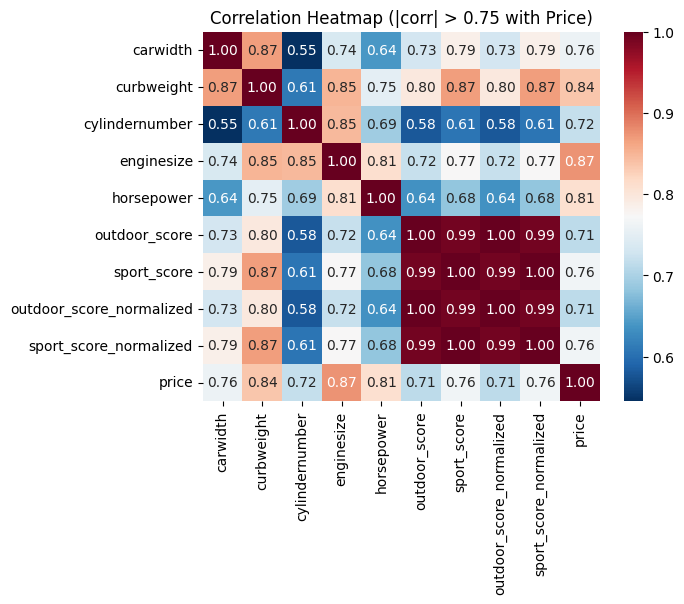

In [39]:
# %pip install nbformat

import seaborn as sns

# Compute correlation matrix
corr_matrix = comp.corr().abs()

# Find columns with correlation > 0.75 with 'price' (excluding 'price' itself)
high_corr_cols = corr_matrix.index[(corr_matrix['price'] > 0.70) & (corr_matrix.index != 'price')].tolist()
# Always include 'price' column for context
cols_to_plot = high_corr_cols + ['price']

# Filter the correlation matrix to only these columns and rows
filtered_corr = corr_matrix.loc[cols_to_plot, cols_to_plot]

# Plot with seaborn
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap='RdBu_r')
plt.title('Correlation Heatmap (|corr| > 0.75 with Price)')
plt.show()


In [40]:
# Get boolean mask of columns highly correlated with price
high_corr_mask = comp.corr().abs()['price'] > 0.70

# Get the column names where mask is True
high_corr_cols = high_corr_mask[high_corr_mask].index.tolist()

# Select those columns from comp
predictors = comp[high_corr_cols]

predictors.corr().abs()

,carwidth,curbweight,cylindernumber,enginesize,horsepower,price,outdoor_score,sport_score,outdoor_score_normalized,sport_score_normalized
carwidth,1.000000,0.867032,0.545007,0.735780,0.640732,0.759325,0.731617,0.786622,0.731617,0.786622
curbweight,0.867032,1.000000,0.609727,0.850703,0.750739,0.835305,0.796483,0.868447,0.796483,0.868447
cylindernumber,0.545007,0.609727,1.000000,0.846078,0.692016,0.718304,0.579772,0.606700,0.579772,0.606700
enginesize,0.735780,0.850703,0.846078,1.000000,0.809861,0.874282,0.720577,0.774053,0.720577,0.774053
horsepower,0.640732,0.750739,0.692016,0.809861,1.000000,0.808138,0.635529,0.682789,0.635529,0.682789
price,0.759325,0.835305,0.718304,0.874282,0.808138,1.000000,0.712522,0.764132,0.712522,0.764132
outdoor_score,0.731617,0.796483,0.579772,0.720577,0.635529,0.712522,1.000000,0.991483,1.000000,0.991483
sport_score,0.786622,0.868447,0.606700,0.774053,0.682789,0.764132,0.991483,1.000000,0.991483,1.000000
outdoor_score_normalized,0.731617,0.796483,0.579772,0.720577,0.635529,0.712522,1.000000,0.991483,1.000000,0.991483
sport_score_normalized,0.786622,0.868447,0.606700,0.774053,0.682789,0.764132,0.991483,1.000000,0.991483,1.000000


In [41]:
df.to_csv('Data/cleaned/cars_processed.csv', index=False)

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
